In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

In [2]:
dataset = pd.read_csv('output/3_dataset.csv')
X = dataset.as_matrix(columns=['NumViolations'])
y = dataset.as_matrix(columns=['IsBlighted']).ravel()

In [3]:
m = DecisionTreeClassifier(max_depth=1)
scores = cross_val_score(m, X, y, cv=5)
print(scores)
print('Accuracy: {:.2f} (+/- {:.2f})'.format(scores.mean(), scores.std() * 2))

[ 0.5939759   0.60963855  0.59445338  0.60450161  0.60811897]
Accuracy: 0.60 (+/- 0.01)


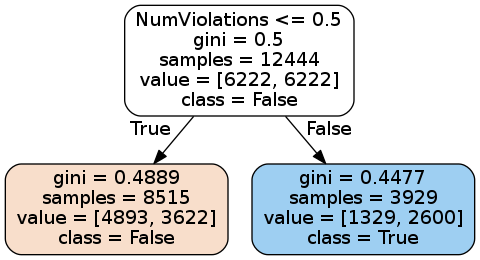

In [4]:
m.fit(X, y)
dot_data = export_graphviz(
    decision_tree=m,
    out_file=None,
    feature_names=['NumViolations'],
    class_names=[str(c) for c in m.classes_],
    filled=True,
    rounded=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())